# 3. 📌 Introduction to PyTorch

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:** 
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/bfortuno/Surgical-Phase-Recognition/blob/main/docs/tutorial_notebooks/tutorial3/pytorch_intro.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bfortuno/Surgical-Phase-Recognition/blob/main/docs/tutorial_notebooks/tutorial3/pytorch_intro.ipynb)    
**Author:** Benjamin I. Fortuno

This notebook provides a comprehensive introduction to PyTorch, covering:
- 🔢 Tensor creation and operations
- 📏 Reshaping and slicing
- ⚡ Matrix operations
- 🎯 Automatic differentiation with `autograd`
- 📈 Visualization of computation graphs

By the end of this notebook, you'll be comfortable using PyTorch for basic computations and setting up gradients for deep learning models.

## 🛠️ Setting Up PyTorch

In [2]:
import torch
import numpy as np
import time

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## 🔢 Creating and Manipulating Tensors
Tensors are similar to NumPy arrays but come with GPU acceleration and automatic differentiation.

In [3]:
# Creating different types of tensors
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, device=device)
y = torch.rand((2,2), device=device)  # Random tensor
z = torch.zeros((3,3), device=device)  # Zero tensor
ones = torch.ones((3,3), device=device)  # Ones tensor

print("Tensor x:", x, "\n")
print("Random Tensor y:", y, "\n")
print("Zero Tensor:", z, "\n")
print("Ones Tensor:", ones)

Tensor x: tensor([[1., 2.],
        [3., 4.]]) 

Random Tensor y: tensor([[0.1730, 0.2274],
        [0.9773, 0.5024]]) 

Zero Tensor: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 

Ones Tensor: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


### 📏 Tensor Shapes and Reshaping

In [4]:
# Reshaping tensors
x_reshaped = x.view(4, 1)  # Change shape to (4,1)
print("Original Shape:", x.shape)
print("Reshaped Tensor:")
print(x_reshaped)

Original Shape: torch.Size([2, 2])
Reshaped Tensor:
tensor([[1.],
        [2.],
        [3.],
        [4.]])


### 🎭 Indexing and Slicing Tensors

In [5]:
# Indexing tensors
tensor = torch.arange(10)
print("Original Tensor:", tensor)

# Accessing elements
print("First element:", tensor[0])
print("Last element:", tensor[-1])

# Slicing
print("First 5 elements:", tensor[:5])
print("Elements from index 3 to 7:", tensor[3:8])

Original Tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
First element: tensor(0)
Last element: tensor(9)
First 5 elements: tensor([0, 1, 2, 3, 4])
Elements from index 3 to 7: tensor([3, 4, 5, 6, 7])


### ⚡ Matrix Operations

In [6]:
# Matrix multiplication
dot_result = torch.mm(x, x)
print("Matrix Multiplication:")
print(dot_result)

Matrix Multiplication:
tensor([[ 7., 10.],
        [15., 22.]])


### 🔢 Advanced Tensor Operations
Understanding advanced tensor operations helps in optimizing computations and reducing code complexity.

In [7]:
# Stacking and Concatenation
a = torch.rand((3, 3))                      # Random 3x3 tensor
b = torch.rand((3, 3))                      # Random 3x3 tensor
stacked = torch.stack((a, b))               # Stack along a new dimension
concatenated = torch.cat((a, b), dim=0)     # Concatenate along an existing dimension

print("Stacked Tensor Shape:", stacked.shape)
print("Concatenated Tensor Shape:", concatenated.shape)

Stacked Tensor Shape: torch.Size([2, 3, 3])
Concatenated Tensor Shape: torch.Size([6, 3])


## 🎯 Automatic Differentiation with Autograd
PyTorch's `autograd` module enables automatic differentiation for computing gradients in neural networks.

In [8]:
# Defining tensors with gradient tracking
a = torch.tensor([2.0, 3.0], requires_grad=True, device=device)
b = torch.tensor([4.0, 5.0], requires_grad=True, device=device)

# Define function: f = a^2 + b^3
f = a**2 + b**3
print("Function values:")
print(f)

Function values:
tensor([ 68., 134.], grad_fn=<AddBackward0>)


In [9]:
# Compute Gradients
f.backward(torch.tensor([1.0, 1.0], device=device))
print("\nGradients:")
print(f"df/da: {a.grad}")
print(f"df/db: {b.grad}")


Gradients:
df/da: tensor([4., 6.])
df/db: tensor([48., 75.])


### 📈 Visualizing Gradients
We can visualize the computation graph and gradients using PyTorch's `torchviz` package.

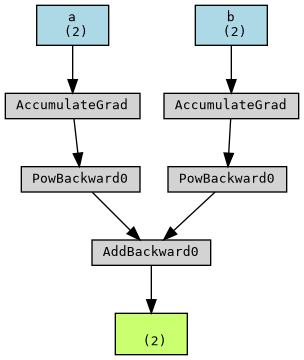

In [10]:
from torchviz import make_dot
from IPython.display import Image

dot_graph = make_dot(f, params={'a': a, 'b': b})  # Create graph
dot_graph.render("computation_graph", format="png")  # Save as PNG

# Display inline in Jupyter
display(Image(filename="computation_graph.png"))


## 🚀 GPU Acceleration
Using GPUs can significantly speed up AI computations, especially when training deep learning models.

In [11]:
# Run this cell if GPU is available
if device == torch.device("cuda"):
    # Comparing CPU vs GPU computation speed
    x_cpu = torch.rand((10000, 10000))
    x_gpu = x_cpu.to(device)

    # Measure time on CPU
    start_cpu = time.time()
    y_cpu = x_cpu * x_cpu
    end_cpu = time.time()

    # Measure time on GPU
    start_gpu = time.time()
    y_gpu = x_gpu * x_gpu
    torch.cuda.synchronize()
    end_gpu = time.time()

    print(f"CPU Time: {end_cpu - start_cpu:.5f} sec")
    print(f"GPU Time: {end_gpu - start_gpu:.5f} sec")

else:
    print("No GPU available. Skipping computation speed comparison.")

No GPU available. Skipping computation speed comparison.


## 🏋️ Exercise: Compute Gradients
**Task:** Define a new function `g = 3a^3 + 2b^2` and compute its gradients.

Try implementing this in the cell below!

In [12]:
# TODO: Define g = 3a^3 + 2b^2 and compute gradients

## 🏁 Summary
- ✅ Learned how to create and manipulate tensors
- ✅ Performed basic mathematical operations
- ✅ Explored automatic differentiation with `autograd`
- ✅ Visualized computation graphs

PyTorch is a powerful tool for deep learning, and mastering these fundamentals will help you in future projects! 🚀